# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()
print(tips)

     total_bill   tip     sex smoker   day    time  size   tip_pct  net_bill
0         16.99  1.01  Female     No   Sun  Dinner     2  0.063204     15.98
1         10.34  1.66    Male     No   Sun  Dinner     3  0.191244      8.68
2         21.01  3.50    Male     No   Sun  Dinner     3  0.199886     17.51
3         23.68  3.31    Male     No   Sun  Dinner     2  0.162494     20.37
4         24.59  3.61  Female     No   Sun  Dinner     4  0.172069     20.98
..          ...   ...     ...    ...   ...     ...   ...       ...       ...
239       29.03  5.92    Male     No   Sat  Dinner     3  0.256166     23.11
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.079428     25.18
241       22.67  2.00    Male    Yes   Sat  Dinner     2  0.096759     20.67
242       17.82  1.75    Male     No   Sat  Dinner     2  0.108899     16.07
243       18.78  3.00  Female     No  Thur  Dinner     2  0.190114     15.78

[244 rows x 9 columns]


(0.0, 10.5)

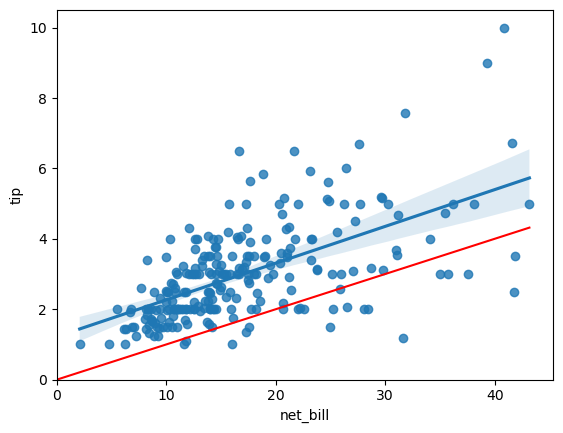

In [5]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [7]:
# Criando a variável tip_pct (percentual da gorjeta) e net_bill (valor sem gorjeta)
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Ajustando o modelo de regressão linear
model = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Exibindo o resumo do modelo
print(model.summary())

# Geração das predições
tips['tip_pct_pred'] = model.predict(tips['net_bill'])


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.52e-06
Time:                        22:16:49   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

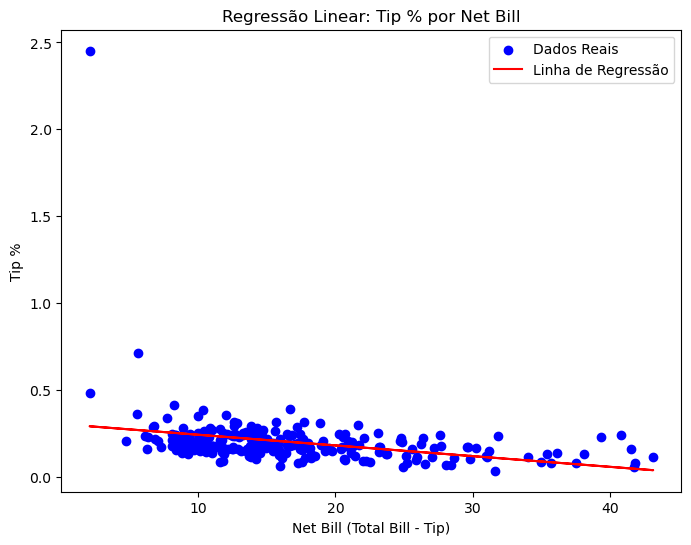

In [9]:

# Gráfico de dispersão com a linha de regressão
plt.figure(figsize=(8, 6))
plt.scatter(tips['net_bill'], tips['tip_pct'], color='blue', label='Dados Reais')
plt.plot(tips['net_bill'], tips['tip_pct_pred'], color='red', label='Linha de Regressão')

# Adicionando rótulos e título
plt.xlabel('Net Bill (Total Bill - Tip)')
plt.ylabel('Tip %')
plt.title('Regressão Linear: Tip % por Net Bill')
plt.legend()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O primeiro gráfico mostra uma relação mais forte entre as variáveis, enquanto o segundo gráfico sugere uma correlação fraca entre o percentual da gorjeta e o valor da conta sem a gorjeta.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [14]:
from sklearn.metrics import r2_score

# Passo 1: Obter o valor predito para tip_pct
tip_pct_pred = model.fittedvalues  # Equivalente ao atributo 'reg.fittedvalues'

# Passo 2: Obter o valor predito para tip (multiplicando o tip_pct_pred pelo net_bill)
tips['tip_pred'] = tip_pct_pred * tips['net_bill']

# Passo 3: Calcular o R^2 para o valor predito de tip
r2_tip_pred = r2_score(tips['tip'], tips['tip_pred'])
print(f"R^2 para o valor predito de tip: {r2_tip_pred}")

# Passo 4: Comparar o R^2 com o modelo do item 1 (ajuste direto de tip por net_bill)
# O R^2 do item 1 já foi obtido com o ajuste direto do modelo:
r2_model_original = r2_score(tips['tip'], model.fittedvalues)
print(f"R^2 para o modelo original (tip_pct): {r2_model_original}")


R^2 para o valor predito de tip: 0.1088997484546137
R^2 para o modelo original (tip_pct): -4.1431500243438695
